## Fallstudie Fashion Avenue        

Pandas werden import, nachdem sie über pip installiert worden sind, head zeigt die ersten 5 Daten der Csv Datei

In [1]:
# Importieren der Bibliothek pandas
import pandas as pd 

# Einlesen der Daten (hier: csv-Datei)
df = pd.read_csv("CsvData/transactions_fashion_avenue.csv")


# Ausgabe der ersten fünf Zeilen der Tabelle
df.head()

,Kundenname,Alter,Zahlungsmethode,ø Preis,Menge,Datum,Uhrzeit
0,Gislinde Börner,29,EC-Karte,14.99,4,01.01.2022,10:24:44
1,Pierre Ullmann,28,Bar,17.99,4,01.01.2022,10:55:09
2,Rainer Birnbaum,57,Bar,43.99,4,01.01.2022,11:25:31
3,Ekaterina Binner,47,Kreditkarte,36.99,3,01.01.2022,11:30:28
4,Prof. Mandy Riehl,59,Bar,35.99,4,01.01.2022,11:46:50


Aufbereitung der Daten z.B. das Entfernen von fehlenden Werten, das Korrigieren von offensichtlich fehlerhaften Werte, das Umwandeln von Datentypen, das Umbennen von Spalten etc.

In [2]:
# Ausgabe von Informationen über die Tabelle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kundenname       10000 non-null  object 
 1   Alter            10000 non-null  int64  
 2   Zahlungsmethode  10000 non-null  object 
 3   ø Preis          10000 non-null  float64
 4   Menge            10000 non-null  int64  
 5   Datum            10000 non-null  object 
 6   Uhrzeit          10000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


Wenig zum berichtigen, 10000 Transaktion und null werte werden nirgendswo erlaubt.
Umbenennen der Splaten und Ändern des Datentyps

In [6]:
# Umbenennen der Spalte "ø Preis" in "Preis"
df = df.rename(columns={"ø Preis": "Preis"})

# Ändern des Datentyps der Spalten "Datum" und "Uhrzeit"
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')

# Ausgabe von Informationen über die Tabelle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Kundenname       10000 non-null  object        
 1   Alter            10000 non-null  int64         
 2   Zahlungsmethode  10000 non-null  object        
 3   Preis            10000 non-null  float64       
 4   Menge            10000 non-null  int64         
 5   Datum            10000 non-null  datetime64[ns]
 6   Uhrzeit          10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 547.0+ KB


### Transformierung und Visualisierung

In [9]:
# Ausgabe der ersten 5 Zeilen
df.head()

# Hinzufügen einer neuen Spalte "Umsatz", "Wochentag" und "Monat"
df = df.assign(Umsatz = df["Menge"] * df["Preis"], 
               Monat = df["Datum"].dt.month, 
               Woche = df["Datum"].dt.isocalendar().week,
               Wochentag = df["Datum"].dt.day_name())

# Ausgabe der ersten fünf Zeilen der Tabelle
df.head()

,Kundenname,Alter,Zahlungsmethode,Preis,Menge,Datum,Uhrzeit,Umsatz,Monat,Woche,Wochentag
0,Gislinde Börner,29,EC-Karte,14.99,4,2022-01-01,10:24:44,59.96,1,52,Saturday
1,Pierre Ullmann,28,Bar,17.99,4,2022-01-01,10:55:09,71.96,1,52,Saturday
2,Rainer Birnbaum,57,Bar,43.99,4,2022-01-01,11:25:31,175.96,1,52,Saturday
3,Ekaterina Binner,47,Kreditkarte,36.99,3,2022-01-01,11:30:28,110.97,1,52,Saturday
4,Prof. Mandy Riehl,59,Bar,35.99,4,2022-01-01,11:46:50,143.96,1,52,Saturday


Wir können nun den Umsatztrend über die Zeit untersuchen. Um den Trend in einer Zeitreihe zu analysieren bietet es sich an, die Zeitreihe graphisch darzustellen. Lassen Sie uns zunächst die Umsatzdaten in einem Liniendiagramm darstellen. Auch wenn dies nicht zwingend notwendig ist und es auch andere Ansätze gäbe, verwenden wir die Bibliothek seaborn (siehe hier). Die Bibliothek wurde für die Zwecke der explorativen Datenanalyse entwickelt und bietet eine Vielzahl von Funktionen, die es uns ermöglichen, die Daten schnell und einfach zu visualisieren. Um ein Liniendiagramm zu erstellen, verwenden wir die Funktion lineplot()

C:\Users\cicek\AppData\Local\Temp\ipykernel_13176\323950303.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  line = sns.lineplot(data=df, x="Datum", y="Umsatz", ci=None);


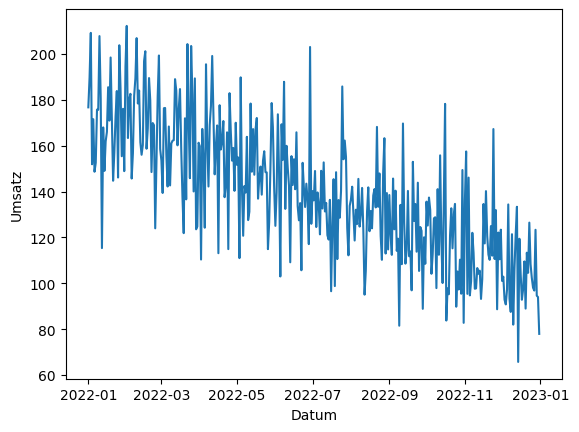

In [11]:
# Laden der Bibliothek seaborn
import seaborn as sns

# Erstellen eines Liniendiagramms
line = sns.lineplot(data=df, x="Datum", y="Umsatz", ci=None);

Der Trend ist deutlich erkennbar. Der Umsatz scheint kontinuierlich zu sinken. Jedoch ist der Umsatz sehr volatil, da wir jede einzelne Transaktion im Graphen visualisiert haben. Es macht daher Sinn, die Umsatzdaten zu aggregieren und dann zu visualisieren. Wir können z.B. die Umsätze einer Woche oder eines Monats aggregieren und dann in einem Liniendiagramm darstellen. Lassen Sie uns die Wochenumsätze betrachten. Hierfür müssen wir die Transaktionen für jede Woche im Jahr (d.h. Wochen 1 bis 52) aufsummieren. Dazu verwenden wir die Funktion groupby(), um die Daten zu gruppieren und die Funktion agg() um die Daten zu aggregieren. In unserem speziellen Fall wollen wir die Summe der Umsätze pro Woche berechnen.

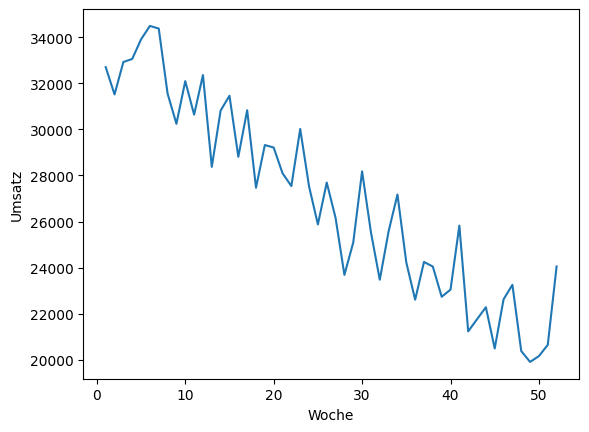

In [12]:
# Aggregieren der Umsätze pro Woche
umsatz_pro_woche = df.groupby("Woche").agg({"Umsatz": "sum"})
sns.lineplot(data=umsatz_pro_woche, x=umsatz_pro_woche.index, y="Umsatz");

Wir sehen, dass der Umsatzrückgang auch für die Wochenumsätze deutlich erkennbar ist. Lassen Sie uns nun die Monatsumsätze betrachten. Hierfür müssen wir die Transaktionen für jeden Monat im Jahr (d.h. Monate 1 bis 12) aufsummieren. Der obige Code kann hierfür nahezu unverändert verwendet werden; lediglich die Spalte Woche muss durch die Spalte Monat ersetzt werden.

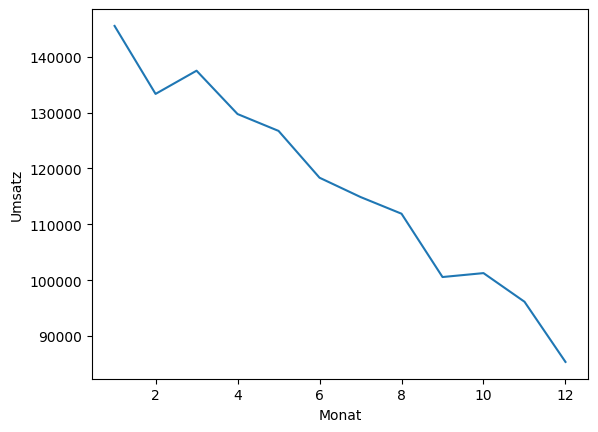

In [13]:
# Aggregieren der Umsätze pro Monat
umsatz_pro_monat = df.groupby("Monat").agg({"Umsatz": "sum"})
sns.lineplot(data=umsatz_pro_monat, x=umsatz_pro_monat.index, y="Umsatz");

1. die Preise sind gesunken
2. die Nachfrage ist gesunken
3. das Zahlungsverhalten der Kunden hat sich verändert
4. die Kundenstruktur hat sich verändert

#### Ursache 1: Preise sind gesunken

Eine mögliche Ursache für den Umsatzrückgang ist, dass die Kunden je Kauf (d.h. in unserem Fall je Transaktion bzw. je Zeile im Datensatz) weniger Geld ausgeben. Um dies zu überprüfen können wir schauen, ob der Preis je Transaktion über die Zeit gesunken ist. Lassen Sie uns dazu auch wieder eine monatliche Aggregation der Daten durchführen. Wir gruppieren also unsere Daten wieder nach Monat und aggregieren die Preise pro Monat. Für den Preis macht es jedoch keinen Sinn diesen zu summieren, sondern wir wollen den Durchschnittspreis pro Monat berechnen. Dazu verwenden wir die Funktion mean().

In [14]:
# Aggregieren der Preise pro Monat
preis_pro_monat = df.groupby("Monat").agg({"Preis": "mean"})
preis_pro_monat

,Preis
Monat,
1,36.414883
2,36.276086
3,35.280247
4,34.511845
5,33.416557
6,32.534903
7,31.507606
8,30.860892
9,29.140485


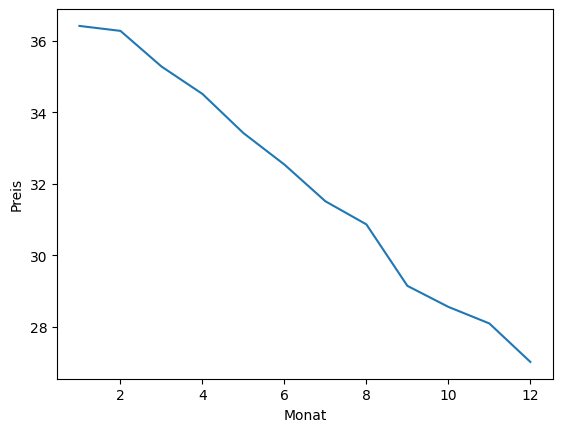

In [15]:
sns.lineplot(data=preis_pro_monat, x=preis_pro_monat.index, y="Preis");

Die Analyse zeigt deutlich, dass der durchschnitlliche Umsatz je Transaktion über die Zeit gesunken ist. Während Kunden im Januar 2022 noch durchschnittlich 35,20 € pro Transaktion ausgegeben haben, waren es im Dezember 2022 nur noch 29,11 €. Davon ausgehend, dass das Unternehmen die Preise in diesem Zeitraum nicht gesenkt hat, ist dies ein Indikator dafür, dass Kunden günstigere Produkte auszuwählen scheinen.

#### Ursache 2: Nachfrage ist gesunken

Eine weitere mögliche Ursache für den Umsatzrückgang ist, dass die Nachfrage nach den Produkten des Unternehmens gesunken ist. Um dies zu überprüfen können wir schauen, ob die durchschnittliche Menge je Transaktion über die Zeit gesunken ist. Lassen Sie uns dazu auch wieder eine monatliche Aggregation der Daten durchführen. Wir gruppieren also unsere Daten wieder nach Monat und aggregieren die Mengen pro Monat. Für die Menge macht es jedoch keinen Sinn diese zu summieren, sondern wir wollen die durchschnittliche Menge pro Monat berechnen. Dazu verwenden wir die Funktion mean().

In [16]:
# Aggregieren der Menge pro Monat 
menge_pro_monat = df.groupby("Monat").agg({"Menge": "mean"})
menge_pro_monat

,Menge
Monat,
1,4.496479
2,4.583875
3,4.359577
4,4.293689
5,4.199765
6,4.099515
7,3.988263
8,3.980047
9,3.875000


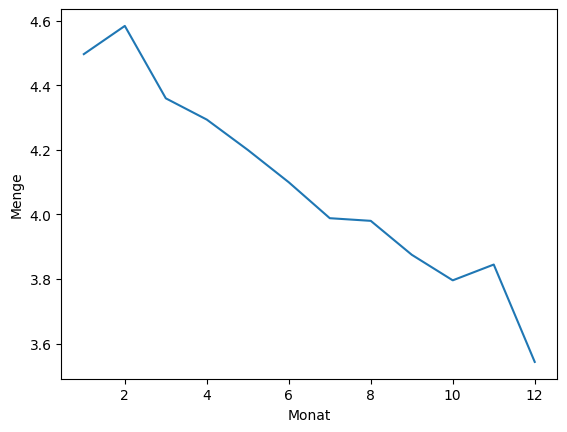

In [17]:
sns.lineplot(data=menge_pro_monat, x=menge_pro_monat.index, y="Menge");

Aus der Analyse geht hervor, dass auch die durchschnittliche Menge je Transaktion über die Zeit gesunken ist. In Summe hat unsere (an dieser Stelle nur sehr oberflächliche) Analyse aufgezeigt, dass Kunden je Einkauf günstigere und kleinere Mengen kaufen.

Lassen Sie uns nun noch die beiden Ursachen 3 und 4 untersuchen, da wir uns zum einen nicht auf eine einzige Ursache festlegen wollen und zum anderen auch die anderen Ursachen nicht ausschließen können. Auch können uns die weiteren Analysen ggf. Aufschluss darüber geben, warum die Kunden günstigere und kleinere Mengen kaufen.

#### Ursache 3: Zahlungsverhalten der Kunden hat sich verändert

Der Datensatz enthält nicht viele Informationen über das Zahlungsverhalten. Wir haben lediglich die Information über die Zahlungsmethode. Schauen wir uns deshalb doch zunächst an, ob die Kunden eine Zahlungsmethode bevorzugen.

Dazu berechnen wir zunächst die Gesamtumsätze sowie Anzahl an Transaktionen je Zahlungsmethode. Wir können dies wieder über einen simple Gruppierung der Daten via groupby() und anschließender Aggregation der Daten via agg() erreichen.

In [18]:
# Berechnen der Gesamtumsätze und Anzahl an Transaktionen je Zahlungsmethode
umsatz_je_zahlungsmethode = df.groupby("Zahlungsmethode").agg({"Umsatz": ["sum", "count"]})
umsatz_je_zahlungsmethode

Umsatz      
                       sum count
Zahlungsmethode                 
Bar              476976.95  3370
EC-Karte         477491.92  3413
Kreditkarte      446887.50  3217

Die Aufstellung zeigt, dass die Summe an Umsätzen sowie die Anzahl an Transaktionen sich nicht sehr stark unterscheiden, je nachdem ob die Kunden mit Kreditkarte, Bar oder per EC-Karte bezahlt haben.

Durch die Aggregation der Umsätze kann Information verloren gehen, so dass es mit unter Sinn macht, die einzelnen Transaktionsdaten zu visualisieren. Hierzu eignen sich Diagramme, die Verteilungen und Streuungen von Daten darstellen. Ein solches Diagramm ist das sogenannte Stripplot. Dieses Diagramm zeigt die Verteilung der Datenpunkte in einem Diagramm an.

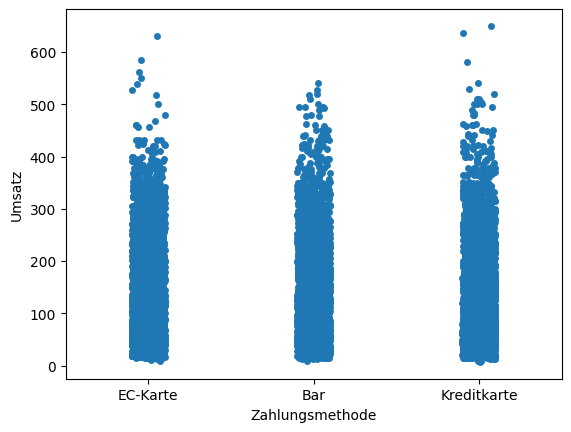

In [19]:
sns.stripplot(data=df, x="Zahlungsmethode", y="Umsatz");

Es wird deutlich, dass sich die Streuung der Umsätze je nach Zahlungsmethode nicht wesentilch unterscheiden.

Wir wissen nun, dass Kunden, die z.B. viel und teuer erkaufen nicht eine bestimmte Zahlungsmethode bevorzugen. Jedoch haben wir noch nicht untersucht, ob sich das Zahlungsverhalten der Kunden über die Zeit verändert hat.

Lassen Sie uns dies nun untersuchen. Dazu berechnen wir die Umsätze je Monat und je Zahlungsmethode. Das folgende Diagramm zeigt die Umsätze je Monat und je Zahlungsmethode.

C:\Users\cicek\AppData\Local\Temp\ipykernel_13176\3088236847.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df, x="Monat", y="Umsatz", kind="point", hue="Zahlungsmethode", ci=None);


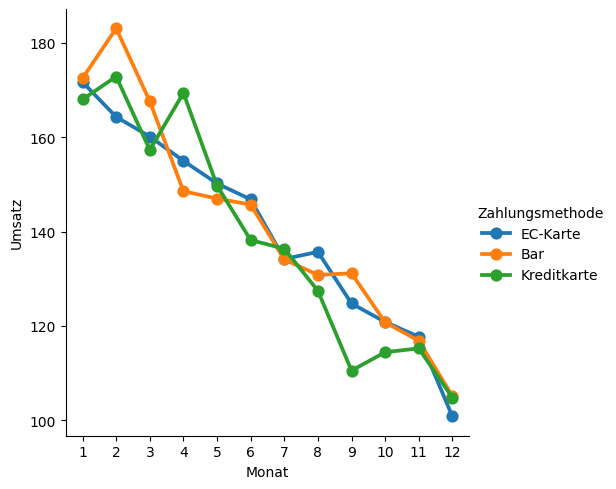

In [20]:
sns.catplot(data=df, x="Monat", y="Umsatz", kind="point", hue="Zahlungsmethode", ci=None);

Die Analyse liefert uns keine neuen Erkenntnisse hinsichtlich der Ursache für den Umsatzrückgang. Die Umsätze je Monat und je Zahlungsmethode unterscheiden sich nicht wesentlich und insgesamt ist der Umsatzrückgang über die Zeit sehr ähnlich.

Lassen Sie uns deshalb die vierte mögliche Ursache untersuchen.

#### Ursache 4: Kundenstruktur hat sich verändert

Auch zur Kundenstruktur haben wir nur wenige Informationen. Wir wissen lediglich, wie alt die Kunden sind. Für weitere Analysen müssten wir uns mit dem Unternehmen in Verbindung setzen und weitere Informationen über die Kundenstruktur erhalten.

Bevor wir eine mögliche Veränderung der Kundenstruktur (in unserem Falle: Alter) analysieren, sollten wir zunächst die Verteilung der Kunden anhand ihres Alters untersuchen, um ein Gefühl für unsere Kundenstruktur zu bekommen. Wir können das über ein Histogramm visualisieren, welches wir mit der Funktion histplot() aus der Bibliothek seaborn erstellen können.

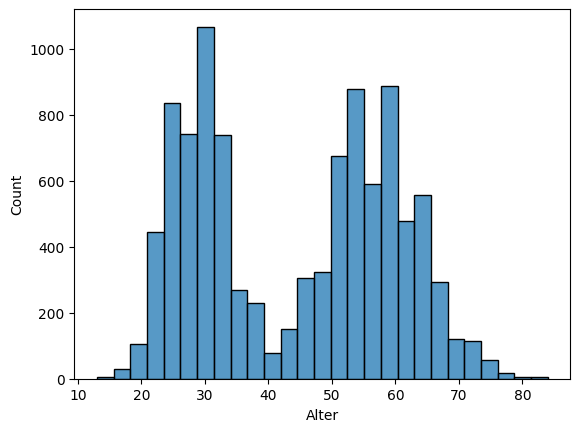

In [21]:
sns.histplot(data=df, x="Alter");

Die Verteilung der Kunden zeigt, dass unsere Kunden grds. aus allen Altersgruppen kommen. Jedoch fällt auf, dass die Verteilung zwei Spitzen aufweist. Die erste Spitze liegt bei ca. 25 Jahren, die zweite Spitze bei ca. 55 Jahren.

Lassen Sie uns nun schauen, ob Kunden mit einem bestimmten Alter mehr oder weniger kaufen. Um dies zu untersuchen, berechnen wir einen neue Variable Altersgruppe, die die Kunden in Altersgruppen von 10 Jahren aufteilt, d.h. die Kunden werden in die Altersgruppen 0-20, 21-30, 31-40, …, 81-90, 91-100 eingeteilt.4

In [22]:
# Berechnen der Altersgruppen
df["Altergruppe"] = pd.cut(df["Alter"], 
                            bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                            labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])
df.head()

,Kundenname,Alter,Zahlungsmethode,Preis,Menge,Datum,Uhrzeit,Umsatz,Monat,Woche,Wochentag,Altergruppe
0,Gislinde Börner,29,EC-Karte,14.99,4,2022-01-01,10:24:44,59.96,1,52,Saturday,21-30
1,Pierre Ullmann,28,Bar,17.99,4,2022-01-01,10:55:09,71.96,1,52,Saturday,21-30
2,Rainer Birnbaum,57,Bar,43.99,4,2022-01-01,11:25:31,175.96,1,52,Saturday,51-60
3,Ekaterina Binner,47,Kreditkarte,36.99,3,2022-01-01,11:30:28,110.97,1,52,Saturday,41-50
4,Prof. Mandy Riehl,59,Bar,35.99,4,2022-01-01,11:46:50,143.96,1,52,Saturday,51-60


Nun können wir die Umsätze je Altersgruppe berechnen und visualisieren. Die untenstehende Tablle zeigt die durchschnittlichen Umsätze je Transaktion und je Altersgruppe.

In [23]:
# Berechnen der Umsätze je Altersgruppe
umsatz_je_alter = df.groupby("Altergruppe").agg({"Umsatz": ["mean", "count"]})
umsatz_je_alter

C:\Users\cicek\AppData\Local\Temp\ipykernel_13176\1218392357.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  umsatz_je_alter = df.groupby("Altergruppe").agg({"Umsatz": ["mean", "count"]})


Umsatz      
                   mean count
Altergruppe                  
0-20          61.991679   137
21-30         63.482432  2738
31-40         66.317305  1629
41-50        193.778857  1024
51-60        203.674966  2827
61-70        204.916333  1448
71-80        203.356615   192
81-90        207.144000     5
91-100              NaN     0

Die Tabelle zeigt deutlich, dass unterschiedliche Altergruppen unterschiedliche Umsätze generieren. Kunden bis ca. 40 Jahre geben im Schnitt deutlich weniger aus, als Kunden, die älter als 40 Jahre sind.

Aus der untenstehenden Visualisierung geht dies noch deutlicher hervor.

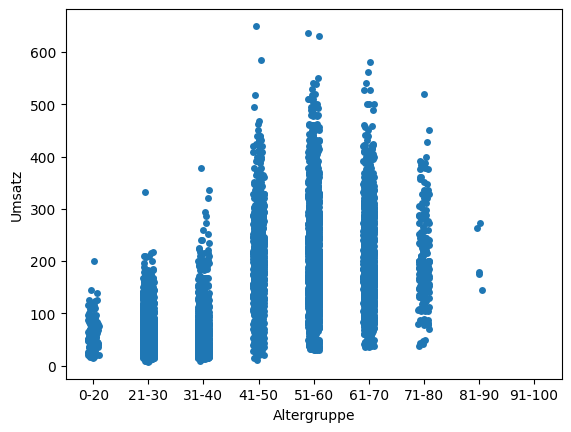

In [24]:
sns.stripplot(data=df, x="Altergruppe", y="Umsatz", jitter=0.1);

Es scheint also so, als ob sich die Kundenstruktur verändert hat. Kunden bis ca. 40 Jahre kaufen weniger oder günstiger ein, als Kunden, die älter als 40 Jahre sind.

Diese Erkenntnis alleine reicht jedoch nicht aus, um die Ursache für den Umsatzrückgang zu finden. Wir müssen nun untersuchen, ob sich die Altersstruktur über die Zeit verändert hat. Eine Erklärung für den Umsatzrückgang könnte sein, dass das Unternehmen mit der Zeit mehr Kunden aus der Altersgruppe “unter 40” gewonnen hat, die weniger oder günstiger kaufen.

Um dies zu untersuchen, berechnen wir zunächst eine neue Variable Kundengruppe mit den Werten “alt” (>40 Jahre) und “jung” (<=40 Jahre). Wir können dann im Anschluss schauen, ob der Anteil an jungen Kunden in den letzten Monaten gestiegen ist.

In [25]:
# Berechnen der Kundengruppe
import numpy as np 
df["Kundengruppe"] = np.where(df["Alter"] <= 40, "jung", "alt")
df.head()

,Kundenname,Alter,Zahlungsmethode,Preis,Menge,Datum,Uhrzeit,Umsatz,Monat,Woche,Wochentag,Altergruppe,Kundengruppe
0,Gislinde Börner,29,EC-Karte,14.99,4,2022-01-01,10:24:44,59.96,1,52,Saturday,21-30,jung
1,Pierre Ullmann,28,Bar,17.99,4,2022-01-01,10:55:09,71.96,1,52,Saturday,21-30,jung
2,Rainer Birnbaum,57,Bar,43.99,4,2022-01-01,11:25:31,175.96,1,52,Saturday,51-60,alt
3,Ekaterina Binner,47,Kreditkarte,36.99,3,2022-01-01,11:30:28,110.97,1,52,Saturday,41-50,alt
4,Prof. Mandy Riehl,59,Bar,35.99,4,2022-01-01,11:46:50,143.96,1,52,Saturday,51-60,alt


Den Anteil an jungen Kunden je Monat berechnen wir, indem wir die Anzahl der jungen Kunden je Monat durch die Gesamtanzahl der Kunden je Monat teilen. Die untenstehende Tabelle zeigt die Ergebnisse.

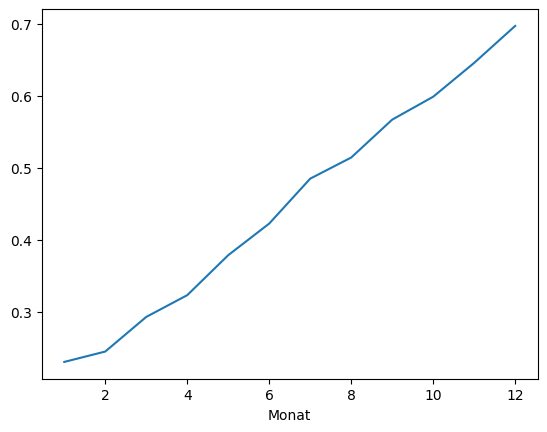

In [26]:
# Berechnen des Anteils an jungen Kunden je Monat
df.groupby(["Monat"]).agg({"Kundengruppe": [lambda group: sum(group == "jung")/len(group)]}).plot(legend=False);

Es ist offensichtlich, dass der Anteil an jungen Kunden in den letzten Monaten gestiegen ist. Dies könnte die Ursache für den Umsatzrückgang sein.

Die untenstehende Visualisierung zeigt die Entwicklung der Umsätze je Monat und je Kundengruppe (jung vs. alt). Die blaue Linie zeigt die Umsätze der jungen Kunden, die orangene Linie zeigt die Umsätze der alten Kunden. Es ist ersichtlich, dass die Umsätze der jeweiligen Kundengruppen in den letzten Monaten konstant geblieben sind. Dies bestätigt die Hypothese, dass der Umsatzrückgang auf den Anstieg des Anteils an jungen Kunden zurückzuführen ist und nicht darauf, dass sich die Umsätze der jeweiligen Kundengruppen verändert haben.

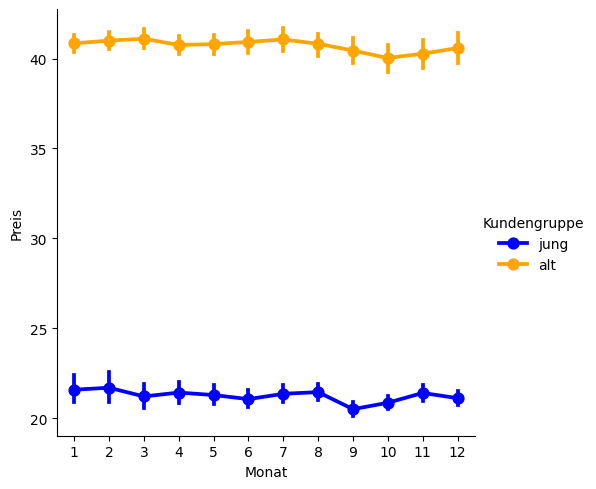

In [27]:
sns.catplot(x="Monat", y="Preis", 
            data=df,  kind="point", 
            palette={"jung": "blue", "alt": "orange"}, hue="Kundengruppe");

Zwischenfazit
Lassen Sie uns - bevor wir mit unser Analyse fortfahren - ein kurzes Zwischenfazit ziehen und unsere bisherigen Erkenntnisse zusammenfassen.

- wir haben im ersten Schritt unsere Problem definiert (“Was ist der Grund für den Rückgang des Umsatzes?”)
- nachfolgend haben wir die Daten geladen und bereinigt. Die Bereinigung der Daten war nicht besonders umfassend, da der Datensatz bereits sehr sauber war. In der Praxis ist die Bereinigung der Daten jedoch ein sehr wichtiger Schritt, da die Daten in der Regel sehr unvollständig und fehlerhaft sind.
- wir haben dann im nächsten Schritt die Problembeschreibung bestätigt und festgestellt, dass es laut Daten tatsächlich einen Umsatzrückgang gab.
- anschließend haben wir vier Hypothesen für den Umsatzrückgang aufgestellt und diese mit Hilfe der Daten überprüft. Die Hypothesen waren:
    1. die Preise sind gesunken
    2. die Nachfrage ist gesunken
    3. das Zahlungsverhalten der Kunden hat sich verändert
    4. die Kundenstruktur hat sich verändert
- wir haben die Hypothesen mit Hilfe von sinnvollen Transformationen (Gruppierungen und Aggregationen) und Visualisierungen überprüft.
- wir konnten feststellen, dass die ersten beiden Hypothesen zutrafen. Im Zeitverlauf sind die Preise und Mengen tatsächlich gesunken. Jedoch hat uns diese Feststellung keinen Aufschluss darüber gegeben, was der Grund für die Preis- und Mengenänderungen ist.
- wir konnten keinen Zusammenhang zwischen der Zahlungsart und der Umsatzentwicklung entdecken.
- wir haben dann jedoch festgestellt, dass die Kundenstruktur sich verändert hat. Wir haben mehr Kunden aus der Altersgruppe “unter 40” gewonnen, die weniger oder günstiger kaufen. Dies könnte der Grund für den Umsatzrückgang sein.

Fazit: Der Umsatzrückgang ist auf die Veränderung der Kundenstruktur zurückzuführen. Wir haben mehr Kunden aus der Altersgruppe “unter 40” gewonnen, die weniger oder günstiger kaufen.

Wir werden an dieser Stelle noch nicht im Detail auf die Modellierung eingehen, sondern stattdessen nur ein kurzes Beispiel geben, um Ihnen einen Eindruck davon zu geben, wie wir mit Hilfe von Modellen Erkenntnisse gewinnen können.

In unserem Zwischenfazit haben wir zusammegefasst, dass der Umsatzrückgang auf die Veränderung der Kundenstruktur zurückzuführen ist. Der Anteil an jüngeren Kunden hat sich vergrößert und diese Kunden kaufen günstiger und weniger.

Lassen Sie uns diese Erkenntnis noch einmal alternativ graphisch darstellen. Wir gruppieren unsere Daten dafür pro Tag (d.h. wir aggregieren einzelne Transaktionen pro Tag) und schauen uns für jeden Tag den durschnittlichen Umsatz sowie das durchschnittliche Kundenalter an.5. Anschließend stellen wir die Daten in einem Streudiagramm dar. Wir sehen, dass es einen Zusammenhang zwischen Umsatz und Alter gibt. Je älter die Kunden sind, desto höher ist der Umsatz. Der Zusammenhang wird durch die Linie, die wir dem Graphen hinzugefügt haben visualisiert.

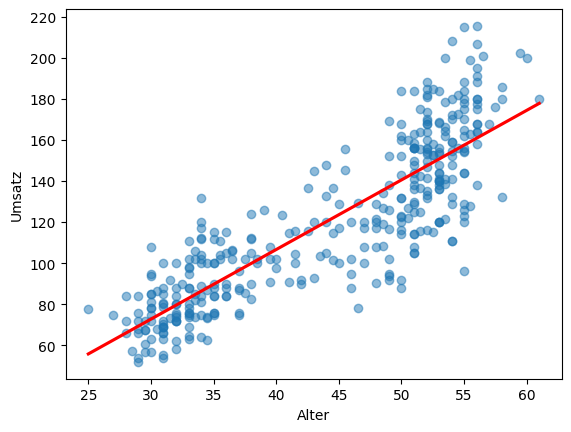

In [28]:
umsatz_by_alter = df.groupby("Datum").agg({"Umsatz": "median", 
                                           "Alter": "median"})
sns.regplot(x="Alter", y="Umsatz", data=umsatz_by_alter, ci=True, 
            line_kws={"color": "red"}, scatter_kws={"alpha": 0.5});

Die Linie ist ein Modell, das die Daten beschreibt. Im vorliegenden Fall handelt es sich um ein lineares Model bzw. eine lineare Funktion. Wir können diese Funktion auch als eine mathematische Gleichung beschreiben. In unserem Fall lautet die Gleichung:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>U</mi>
  <mi>m</mi>
  <mi>s</mi>
  <mi>a</mi>
  <mi>t</mi>
  <mi>z</mi>
  <mo>=</mo>
  <mi>&#x3B1;</mi>
  <mo>+</mo>
  <mi>&#x3B2;</mi>
  <mo>&#x22C5;</mo>
  <mi>A</mi>
  <mi>l</mi>
  <mi>t</mi>
  <mi>e</mi>
  <mi>r</mi>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <mn>28.8</mn>
  <mo>+</mo>
  <mn>3.4</mn>
  <mo>&#x22C5;</mo>
  <mi>A</mi>
  <mi>l</mi>
  <mi>t</mi>
  <mi>e</mi>
  <mi>r</mi>
</math>

Ihnen sollte das Modell bekannt vorkommen, da es sich um ein lineares Regressionsmodell handelt, welches typischerweise zu Beginn des Studiums in einer einführenden Statistikvorlesung behandelt wird. Das Ergebnis, d.h. die Werte für die sogenannten Regressionsparamter 
 und 
 haben wir ebenfalls mit Python berechnet. Die Details sind an dieser Stelle (noch) nicht so wichtig, können jedoch im untenstehenden “Tab-Panel” eingesehen werden.

In [30]:
import statsmodels.formula.api as smf
model = smf.ols(formula="Umsatz ~ Alter", data=umsatz_by_alter)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Umsatz   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     956.1
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          9.67e-104
Time:                        11:49:22   Log-Likelihood:                -1612.6
No. Observations:                 365   AIC:                             3229.
Df Residuals:                     363   BIC:                             3237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.8068      4.931     -5.841      0.000     -38.505     -19.109
Alter          3.3864      0.110     30.920      0.000       3.171       3.602
==============================================================================
Omnibus:                        0.198   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.083
Skew:                          -0.024   Prob(JB):                        0.959
Kurtosis:                       3.056   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Das Modell ist nur ein Beispiel für ein Modell, das wir an dieser Stelle verwenden können oder sollten.

- es kann helfen unsere Erkenntnisse zu validieren: wir könnten dem Modell weitere Variablen hinzufügen und schauen, ob der Zusammenhang zwischen Umsatz und Alter weiterhin Bestand hat und ob dieser robust ist
- es kann helfen Zusammenhänge zu verstehen: wir können das Modell nutzen um zu verstehen, wie sich der Umsatz verändert, wenn wir das Alter der Kunden verändern. Wir können unser Model z.B. wie folgt interpretieren: wenn Kunden im Durchschnitt 1 Jahr älter sind, dann steigt der Umsatz im Durchschnitt um 3,4€. Wir können damit den Effekt der Veränderung der Kundenstruktur auf den Umsatz quantifizieren
- es kann helfen Daten in die Zukunft zu prognostizieren: wir können das Modell nutzen um zu schätzen, wie sich der Umsatz in Zukunft entwickeln wird. Wir können z.B. schätzen, dass der Umsatz nächstes Jahr um x € steigen wird, wenn wir y Jahre ältere Kunden anwerben.6